In [1]:
!pip install wordcloud

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud

In [3]:
# Upload and load the dataset (you can replace this with any file path)
file_path = "Downloads\\phishing\\phishing_new_emails.xls" # Provide your dataset path here
df = pd.read_csv(file_path, low_memory=False)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sender        39154 non-null  object
 1   receiver      38692 non-null  object
 2   date          39154 non-null  object
 3   subject       39126 non-null  object
 4   body          39154 non-null  object
 5   label         39154 non-null  int64 
 6   urls          39154 non-null  int64 
 7   cleaned_body  39152 non-null  object
 8   num_urls      39154 non-null  int64 
 9   body_length   39154 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 3.0+ MB


In [5]:
print(df.columns)

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'cleaned_body', 'num_urls', 'body_length'],
      dtype='object')


Unique labels in the dataset: [1 0]
Label counts: label
Phishing    21842
Genuine     17312
Name: count, dtype: int64


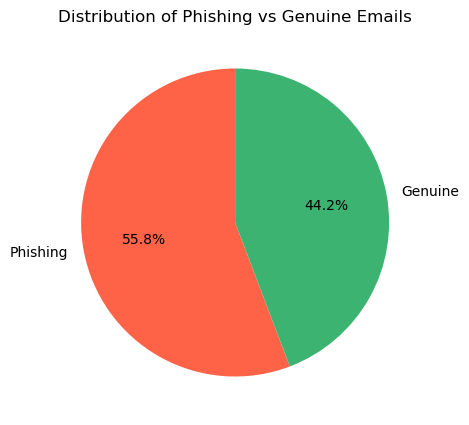

In [6]:


# Ensure 'label' column exists and check its unique values
if 'label' in df.columns:
    print("Unique labels in the dataset:", df['label'].unique())

    # Map numeric labels to strings (if applicable)
    # For example, assuming 0 = Genuine and 1 = Phishing
    if df['label'].dtype != 'object':  # If the labels are numeric
        df['label'] = df['label'].map({0: 'Genuine', 1: 'Phishing'})
    
    # Count the distribution of labels (phishing vs genuine)
    label_counts = df['label'].value_counts()
    print("Label counts:", label_counts)

    # Plot the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(
        label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FF6347', '#3CB371']  # Colors for each label
    )
    
    plt.title('Distribution of Phishing vs Genuine Emails')
    plt.show()
else:
    print("The 'label' column does not exist in the dataset.")


C:\Users\DAR LAPTOPS\AppData\Local\Temp\ipykernel_4240\605334447.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


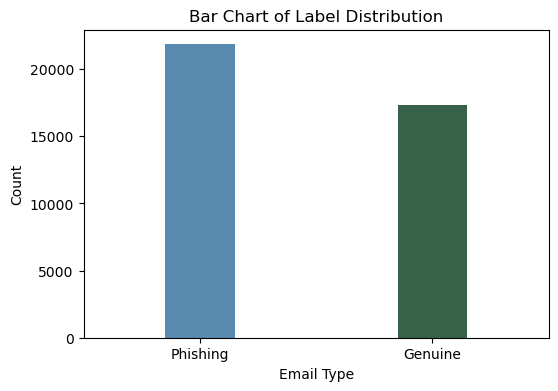

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(6, 4))

# Customize bar width and colors
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette=['#4B8cBE', '#306948'],  # Custom colors
    width=0.3,  # Adjust bar width
    legend=False  # Suppress the legend warning
)

plt.title('Bar Chart of Label Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()


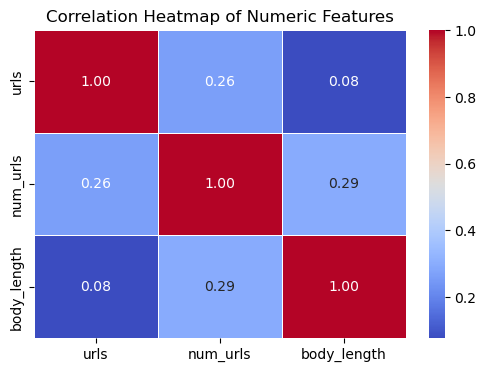

In [8]:
# 4. **Heatmap**: Correlation Between Numeric Features
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty:
    plt.figure(figsize=(6, 4))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print("No numeric features found for correlation heatmap.")


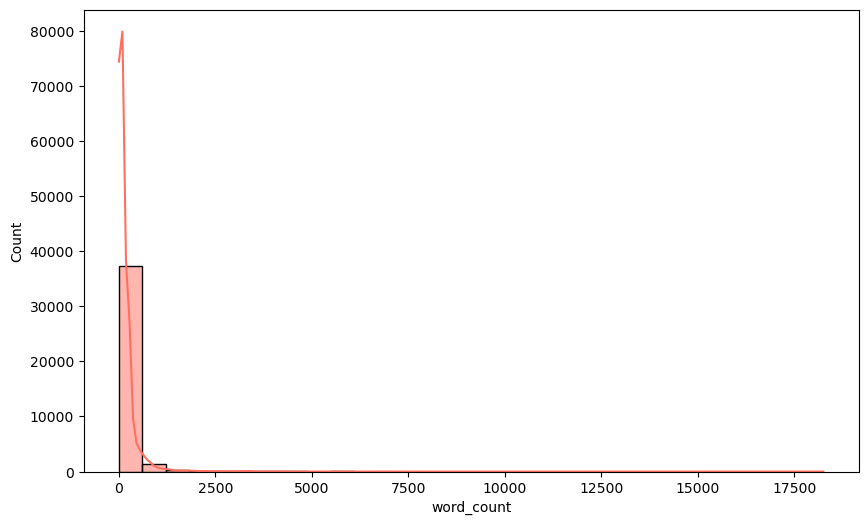

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' contains the dataset and 'cleaned_body' column exists
if 'cleaned_body' in df.columns:
    # Create a new column for word count
    df['word_count'] = df['cleaned_body'].apply(lambda x: len(str(x).split()))
    
    # Plot histogram with vibrant colors
    plt.figure(figsize=(10, 6))
    sns.histplot(
        df['word_count'], 
        bins=30, 
        kde=True, 
        color='#FF6F61',)  # Vibrant coral shade for bars
    plt.show()



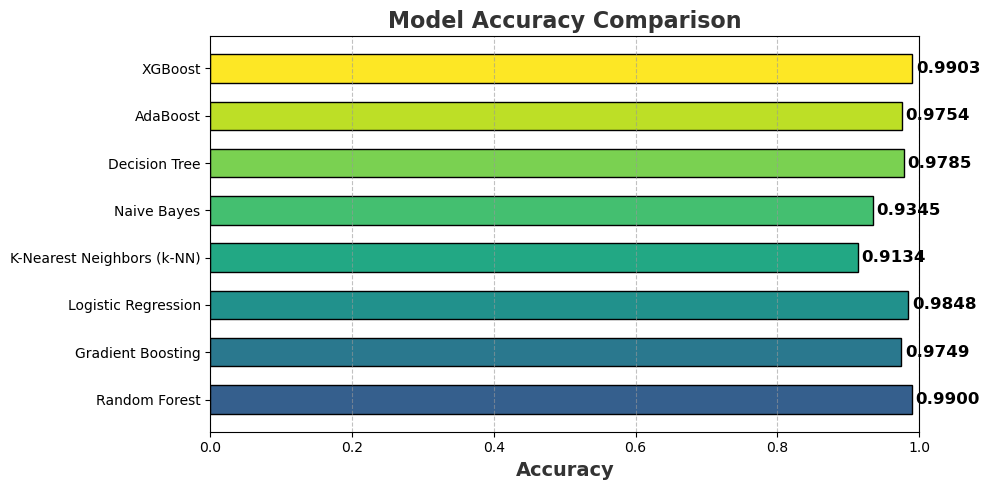

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with model names and their accuracy (replace this with your actual accuracy results)
accuracy_results = {
    'Random Forest': 0.9900,
    'Gradient Boosting' : 0.9749,
    'Logistic Regression': 0.9848,
    'K-Nearest Neighbors (k-NN)': 0.9134,
    'Naive Bayes': 0.9345,
    'Decision Tree': 0.9785,
    'AdaBoost': 0.9754,
    'XGBoost': 0.9903,
    
}

# Get the list of model names and their corresponding accuracy values
models = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

# Generate a color gradient for the bars
colors = plt.cm.viridis(np.linspace(0.3, 1, len(models)))  # Using viridis color map

# Plot the accuracy results as a bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(models, accuracies, color=colors, edgecolor='black', height=0.6)

# Add accuracy labels above the bars for better visibility
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', va='center', ha='left', fontsize=12, fontweight='bold', color='black')

# Customize the axes and grid
plt.xlabel('Accuracy', fontsize=14, fontweight='bold', color='#333333')
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', color='#333333')
plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for accuracy scale
plt.grid(True, axis='x', linestyle='--', alpha=0.6, color='#999999')

# Enhance layout for more clean presentation
plt.tight_layout()

# Display the chart
plt.show()


In [5]:
import pandas as pd
from tabulate import tabulate

# Example dictionary with model names and their accuracy (replace this with your actual accuracy results)
accuracy_results = {
  'Random Forest': 0.9900,
    'Gradient Boosting' : 0.9749,
    'Logistic Regression': 0.9848,
    'K-Nearest Neighbors (k-NN)': 0.9134,
    'Naive Bayes': 0.9345,
    'Decision Tree': 0.9785,
    'AdaBoost': 0.9754,
    'XGBoost': 0.9903,
}

# Create a DataFrame from the accuracy results
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model Name', 'Accuracy'])

# Display the table in a readable format
print(tabulate(accuracy_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════════════╤════════════╕
│ Model Name                 │   Accuracy │
╞════════════════════════════╪════════════╡
│ Random Forest              │     0.99   │
├────────────────────────────┼────────────┤
│ Gradient Boosting          │     0.9749 │
├────────────────────────────┼────────────┤
│ Logistic Regression        │     0.9848 │
├────────────────────────────┼────────────┤
│ K-Nearest Neighbors (k-NN) │     0.9134 │
├────────────────────────────┼────────────┤
│ Naive Bayes                │     0.9345 │
├────────────────────────────┼────────────┤
│ Decision Tree              │     0.9785 │
├────────────────────────────┼────────────┤
│ AdaBoost                   │     0.9754 │
├────────────────────────────┼────────────┤
│ XGBoost                    │     0.9903 │
╘════════════════════════════╧════════════╛


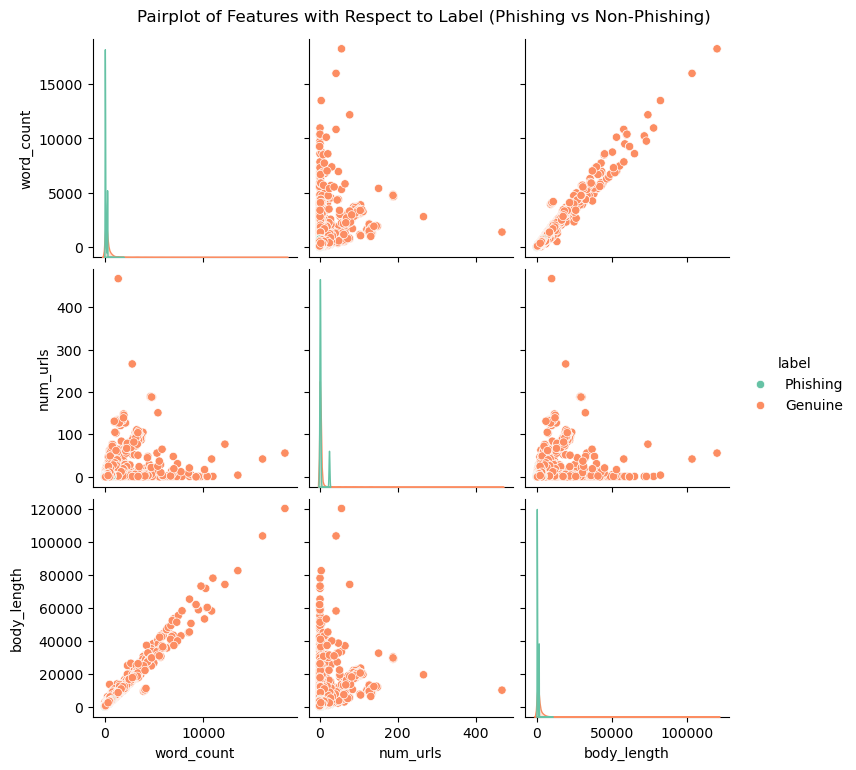

In [13]:
sns.pairplot(df[['word_count', 'num_urls', 'body_length', 'label']], hue='label', palette='Set2')
plt.suptitle('Pairplot of Features with Respect to Label (Phishing vs Non-Phishing)', y=1.02)
plt.show()


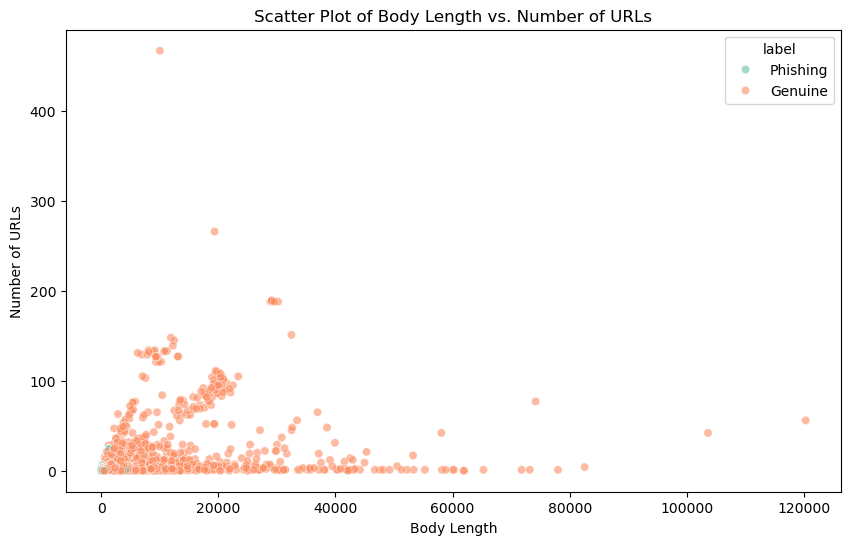

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='body_length', y='num_urls', hue='label', data=df, palette='Set2', alpha=0.6)
plt.title('Scatter Plot of Body Length vs. Number of URLs')
plt.xlabel('Body Length')
plt.ylabel('Number of URLs')
plt.show()
